# Introduction to n-body Simulations
This script is intended to be used as an introduction to making a [n-body simulation](https://en.wikipedia.org/wiki/N-body_simulation) in Python. The notebook uses [newton's law of universal gravitation](https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation) to simulate the motion of n-bodies in a 3D Space. N-body simulations are a powerful tool for investigating the dynamics of systems of particles. A great example of an n-body simulation is the [Millenium Run](https://en.wikipedia.org/wiki/Millennium_Run) where the matter distribution of the universe was simulatied over cosmic time.

Newton's law of universal gravitation is given by the formula:
$$ F = G \frac{m_1 m_2}{r^2} $$
where:
- $F$ is the force between the masses $m_1$ and $m_2$
- $G$ is the gravitational constant
- $r$ is the distance between the two masses

We can rewrite this formula in its vector form as:

$$ \vec{F} = -G \frac{m_1 m_2}{|{\vec{r}}|^2} \hat{r} $$
 or
$$ \vec{F} = -G \frac{m_1 m_2}{|{\vec{r}}|^3} \vec{r} $$
where:
- $\vec{F}$ is the force vector between the masses $m_1$ and $m_2$
- $\vec{r}$ is the vector pointing from $m_1$ to $m_2$
- $\hat{r}$ is the unit vector pointing from $m_1$ to $m_2$
- $|{\vec{r}}|$ is the magnitude of the vector $\vec{r}$


Simply using F = ma we can find the acceleration of the body due to the force acting on it:
$$ \vec{a} = \frac{\vec{F}}{m} $$

which is
$$ \vec{a} = -G \frac{m_2}{|{\vec{r}}|^3} \vec{r} $$

Finally, we can use the acceleration to update the position and velocity of the body:

Using these equations we can compute the force between each body in the simulation, and then use this force to update the position and velocity of each body based on the acceleration. Assuming we are in 3D space we will need to do this for each component of the position and velocity vectors. This is a naive approach to solving the n-body problem, and there are more efficient algorithms that can be used to solve this problem (see [Barnes-Hut simulation](https://en.wikipedia.org/wiki/Barnes%E2%80%93Hut_simulation), [Particle Mesh](https://en.wikipedia.org/wiki/Particle_mesh)).



In [448]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt


In [449]:
# As we are dealing with masses of the sun, and distances in AU (in relaity we would be dealing with parsecs)

# Define the required constants
G = 1#6.67430e-11 # m^3 kg^-1 s^-2

# We will not be using these in out calculations but are a way of representing our results
M_SUN = 1.989e30 # kg
AU = 1.496e11 # m
YEAR = 365.25*24*60*60 # s

# New G if M_SUN = 1 and AU = 1, and time is in years which is 1
# G = 4pi^2 or approx G = 1


# Define the simulation parameters
n_body = 3
delta_t = 0.01 # (in time units) think of every step as 1% of a year 
n_steps = 100000 # how many steps to take
show_step = 10 # use this to see every 10th step

In [450]:
# Setup the required class
class Particle:
    # Define the class constructor
    
    # Inital acceleration
    ax = 0
    ay = 0
    az = 0
    
    def __init__(self, name, mass, x, y, z, vx, vy, vz):
        self.name = name
        self.mass = mass
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
        
    def __str__(self):
        return f"Particle {self.name} has mass {self.mass} and position ({self.x}, {self.y}, {self.z}) and velocity ({self.vx}, {self.vy}, {self.vz})"
    
    # Using the vector form of the equation, calculate the acceleration
    def calculate_acceleration(self, other):
        # Calculate the distance between the two particles
        r = np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2 + (self.z - other.z)**2)
        
        # Calculate the acceleration ( the factor by which we update our position and velocity in the next step)
        a = -G* other.mass / r**3
        
        # Calculate the components of the acceleration
        self.ax = a * (self.x - other.x)
        self.ay = a * (self.y - other.y)
        self.az = a * (self.z - other.z)

    
    def update_velocity(self, dt):
        self.vx += self.ax * dt
        self.vy += self.ay * dt
        self.vz += self.az * dt
        
    def update_position(self, dt):
        self.x += self.vx * dt
        self.y += self.vy * dt
        self.z += self.vz * dt
        

Now that we have our particle class setup with the required methods, we are able to simulate the motion of these bodies. We will need an algorithm that will run the simulation but first we need to define our particle parameters. We will begin by simulating an Earth-Sun system. The earth and sun will be in terms of solar masses, while the distances will be in terms of astronomical units (AU). The time will be in terms of years.


In [451]:
# Setup the particles parameters
bodies = np.array([])


# Inital conditions for the sun, will be in center of the system
mass1 = 1
x1 = 0
y1 = 0
z1 = 0
vx1 = 0
vy1 = 0
vz1 = 0


# inital conditions for the earth: will be one astronomical unit away from the sun
mass2 = 3.003e-6
x2 = 1
y2 = 0
z2 = 0
vx2 = 0
vy2 = 1#6.283e-2 # not sure but will keep it for now
vz2 = 0


# Set a velocity for the earth, recalling that there is a force acting on the object to change it
# We can calculate the velocity required to keep the earth in orbit
# The force of gravity is equal to the centripetal force
# Calculating the vx and vy inital conditions
# F = ma = m v^2 / r


# Setup the particles
p1 = Particle("Sun", mass1, x1, y1, z1, vx1, vy1, vz1)
p2 = Particle("Earth", mass2, x2, y2, z2, vx2, vy2, vz2)

# Adding a third particle
mass3 = 03.213e-7
x3 = -2
y3 = 0
z3 = 0
vx3 = 0
vy3 = 0
vz3 = 0

p3 = Particle("Mars", mass3, x3, y3, z3, vx3, vy3, vz3)


# Put all of the particles into the array
bodies = np.append(bodies, p1)
bodies = np.append(bodies, p2)
bodies = np.append(bodies, p3)


In [452]:
# Ensure we have all the particles in the array as desired
for body in bodies:
    print(body)

Particle Sun has mass 1 and position (0, 0, 0) and velocity (0, 0, 0)
Particle Earth has mass 3.003e-06 and position (1, 0, 0) and velocity (0, 1, 0)
Particle Mars has mass 3.213e-07 and position (-2, 0, 0) and velocity (0, 0, 0)


# The Simulation
Now that we have setup the conditions for the simulation to run, we will ensure that we can run the simulation. To do this we need to run a loop for which the simulation will run in, iterating over every particle and calculating the force between the particle and the other particle. Additionally we should ensure we are saving the output very time.

In [453]:
# Ensure we write the output somewhere
print(f"Writing output to output.txt")
f =  open("nbody_output.txt", "w")
#f.write(", ".join(["Xpos body%i, Ypos body%i" %(i+1, i+1) for i in range(n_body)])+", step, time,\n")

# Writing for all positions: x, y, z
f.write(", ".join(["Xpos%i, Ypos%i, Zpos%i" %(i+1, i+1, i+1) for i in range(n_body)])+", step, time,\n")

Writing output to output.txt


75

In [454]:



time = 0

# We must ensure we are calculating each body with every other body
for step in range(n_steps):
    
    # Have a acceleration array to store
    #a = np.zeros((n_body, n_body))
    
    for j in range(n_body):
        for k in range(n_body):
            if j != k:
                # We must calculate the acceleration of each interacting body
                bodies[j].calculate_acceleration(bodies[k]) 
                bodies[k].calculate_acceleration(bodies[j])
    
    for j in range(n_body):
        bodies[j].update_velocity(delta_t)
        bodies[j].update_position(delta_t)
        
    if step % show_step == 0:
        for i in range(0, n_body):
            f.write(f"{bodies[i].x}, {bodies[i].y}, {bodies[i].z},")
        f.write(f"{step}, {time}\n")
    
    time+=delta_t # Increase the time step a little bit 
    
    
# Once the loop is finished, close the file so we can read it.
f.close()   
        

This simulation will output a text file containing the information about the particles at each time step. We can then read in this file and plot the results to see the track for the motion of the particle.

In [455]:
# Now we have completed the simulation, read the outputs.
f = open("nbody_output.txt", "r")
k = f.readlines()
f.close()

# # Using plotting software, plot the results of the simulation
# for i in range(0, n_body):
#     x = []
#     y = []
#     z = []
#     for j in range(1, len(k)):
#         x.append(float(k[j].split(",")[3*i]))
#         y.append(float(k[j].split(",")[3*i+1]))
#         z.append(float(k[j].split(",")[3*i+2]))
#     plt.plot(x, y, label=f"Body {i+1}")
    





[-1.9999999999666334, -1.9999999977984726, -1.9999999923012706, -1.9999999834926607, -1.9999999714009682, -1.9999999560647506, -1.99999993753219, -1.9999999158603547, -1.9999998911143555, -1.9999998633664267, -1.9999998326949584, -1.9999997991835061, -1.9999997629198059, -1.9999997239948109, -1.999999682501777, -1.9999996385354057, -1.9999995921910543, -1.9999995435640259, -1.9999994927489406, -1.999999439839187, -1.9999993849264546, -1.9999993281003456, -1.999999269448055, -1.9999992090541225, -1.9999991470002414, -1.9999990833651213, -1.9999990182244007, -1.999998951650599, -1.9999988837131024, -1.9999988144781815, -1.999998744009031, -1.9999986723658314, -1.9999985996058238, -1.9999985257833983, -1.9999984509501918, -1.9999983751551895, -1.9999982984448355, -1.9999982208631397, -1.9999981424517903, -1.9999980632502647, -1.9999979832959358, -1.9999979026241805, -1.9999978212684821, -1.9999977392605324, -1.9999976566303252, -1.9999975734062527, -1.999997489615191, -1.9999974052825862,

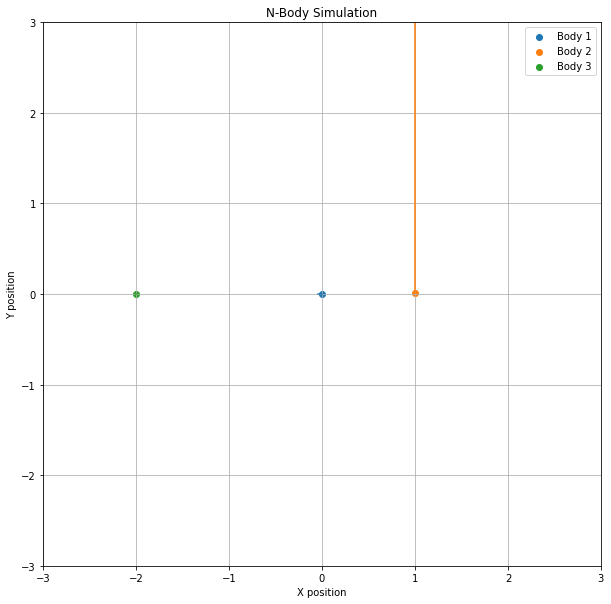

In [456]:
x_coord_lim = 3
y_coord_lim = 3


plt.figure(figsize=(10, 10))
# Plot all values
for i in range(0, n_body):
    x = []
    y = []
    for j in range(1, len(k)):

        x.append(float(k[j].split(",")[3*i]))
        y.append(float(k[j].split(",")[3*i+1]))
    
    # Plot the inital dot
    plt.scatter(x[0], y[0], label=f"Body {i+1}")
    
    # Plot a line after the inital dot
    plt.plot(x, y)

    

print(x)
print("\n")
print(y)
plt.grid()
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("N-Body Simulation")
plt.legend()
plt.xlim(-x_coord_lim, x_coord_lim)
plt.ylim(-y_coord_lim, y_coord_lim)
plt.show()
